In [13]:
# imports/ helper functions
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
pi=np.pi
pm = np.array((-1,1))
r2d,d2r = 180/pi,pi/180
r2d2,d2r2  = 90/pi,pi/90
ori_wrap = lambda x: SDF.wrap(x*2)/2

# modules from this package.
import SD_functions as SDF
import responseModel as RM

def sav_fig(nam):
    root = './Figs/'
    plt.savefig(root + nam +'.svg',dpi=1200)

# Load Data.
1- row per trial. Particiapnts concatenated vertically.


**Informative Columns:**
1. orient - probed item orientation (aka correctAngle)
1. subject       - participant
1. distractor - non-probed item orientation (aka distractAngle)
1. resp    - reported orientation (aka respAngle)
1. acc             - wrap(respAngle-correctAngle); aka (E)
1. respRT            - response time. timed out at 5000ms (aka respRT)
1. indProbed     - which item was probed (First, 0; or second, 1)

**Uninformative Columns:** kappa, traj

In [51]:
data = pd.read_csv('data/WM_noisev8_230316.csv')
data.head()


,orient,distractor,kappa,subject,resp,respRT,acc,traj
0,47,0.0,100,2,NaN,0.000000,NaN,0.0
1,143,1.0,5000,2,153.0,2.423917,10.0,50.0
2,84,0.0,50,2,NaN,0.000000,NaN,0.0
3,104,0.0,100,2,106.0,1.882485,2.0,-19.0
4,161,1.0,50,2,NaN,0.000000,NaN,0.0


In [16]:
n_trial = data.groupby('subject').acc.size().values
print(len(n_trial),np.min(n_trial),np.max(n_trial),
      np.mean(n_trial),np.std(n_trial)/np.sqrt(len(n_trial)-1))


42 360 360 360.0 0.0


# Pooled Bias
Quickly visualize cardinal and serial bias for pooled trials across all subjects.

Notes: 

ori_wrap - * 2 to make it 360* space, makes it -90 to 90

sliding mean 
chipping orientation space -90-90 in 90 bins
sliding window that overlaps by 3*
computing want_var - this could be standard deviation

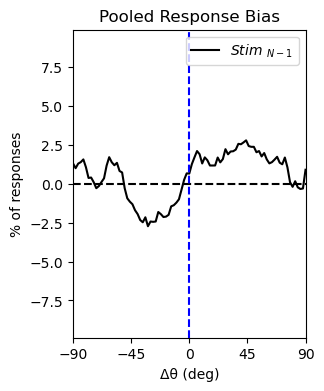

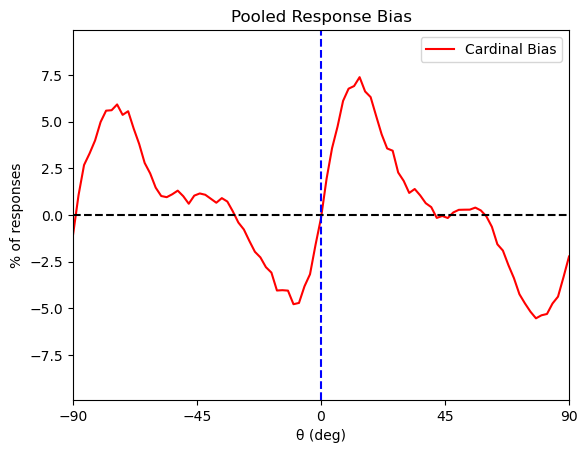

In [52]:
nb=-1
d_ori = SDF.get_nb(nb,data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
this_sd = SDF.do_bining(bns,overlap,d_ori,data['acc']*d2r2,want_var='circ_mean')*r2d2
this_cb = SDF.do_bining(bns,overlap,tmp_ori,data['acc']*d2r2,want_var='circ_mean')*r2d2

plt.figure(figsize=(3,4))
# plt.plot(bns,this_sd)
plt.plot(bns,this_sd,'k',label='$Stim~_{N-1}$')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Pooled Response Bias')
plt.show()

plt.plot(bns,this_cb,color='r',label='Cardinal Bias')
plt.xlabel("θ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Pooled Response Bias')
plt.show()

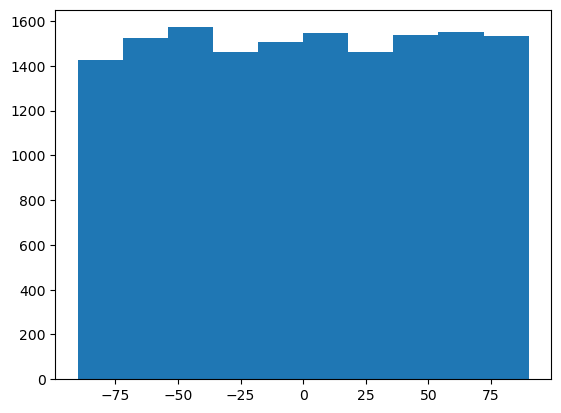

In [46]:
plt.hist(d_ori)
plt.show()

(15120,)

0         47
1        143
2         84
3        104
4        161
        ... 
15115    117
15116    109
15117    101
15118    159
15119     38
Name: orient, Length: 15120, dtype: int64

0